In [1]:
import pandas as pd
import numpy as np

In [2]:
WelfareFacility = pd.read_excel('../data/구별 노인복지시설.xls',  encoding='utf-8')
WelfareFacility.head()

,기간,자치구,시설합계,노인복지관,노인복지관.1,경로당,노인교실
0,기간,자치구,시설합계,시설수,종사자수,경로당,노인교실
1,2017,합계,3815,80,1505,3363,372
2,2017,종로구,71,3,105,57,11
3,2017,중구,51,1,27,47,3
4,2017,용산구,112,2,67,85,25


In [3]:
del WelfareFacility['기간']
WelfareFacility.drop([0],inplace=True)
WelfareFacility.set_index('자치구', inplace=True)
WelfareFacility.rename(columns={'노인복지관.1' : '종사자수'},
                       index={'합계':'서울시'}, inplace=True)
WelfareFacility.head()

,시설합계,노인복지관,종사자수,경로당,노인교실
자치구,,,,,
서울시,3815,80,1505,3363,372
종로구,71,3,105,57,11
중구,51,1,27,47,3
용산구,112,2,67,85,25
성동구,178,3,64,159,16


In [4]:
Senior_Population = pd.read_excel('../data/구별 노인인구수.xls',  encoding='utf-8')
Senior_Population.head()

,기간,구분,합계,합계.1,합계.2,국민기초생활보장수급권자,국민기초생활보장수급권자.1,국민기초생활보장수급권자.2,저소득노인,저소득노인.1,저소득노인.2,일반,일반.1,일반.2
0,기간,구분,계,65~79세,80세 이상,계,65~79세,80세 이상,계,65~79세,80세 이상,계,65~79세,80세 이상
1,2017,합계,303824,227093,76731,59772,44654,15118,18664,11693,6971,225388,170746,54642
2,2017,종로구,7394,5476,1918,1256,965,291,344,199,145,5794,4312,1482
3,2017,중구,5725,4356,1369,1112,851,261,286,176,110,4327,3329,998
4,2017,용산구,8664,5988,2676,2052,1345,707,403,227,176,6209,4416,1793


In [5]:
del Senior_Population['기간']
del Senior_Population['합계.1']
del Senior_Population['합계.2']
del Senior_Population['국민기초생활보장수급권자.1']
del Senior_Population['국민기초생활보장수급권자.2']
del Senior_Population['저소득노인.1']
del Senior_Population['저소득노인.2']
del Senior_Population['일반.1']
del Senior_Population['일반.2']
Senior_Population.drop([0],inplace=True)
Senior_Population.rename(columns={'일반' : '나머지','구분' : '자치구'}, inplace=True)
Senior_Population.set_index('자치구', inplace=True)
Senior_Population.rename(index={'합계':'서울시'}, inplace=True)
Senior_Population['기초수급노인'] = Senior_Population['국민기초생활보장수급권자']+Senior_Population['저소득노인']
del Senior_Population['국민기초생활보장수급권자']
del Senior_Population['저소득노인']
Senior_Population.head()

,합계,나머지,기초수급노인
자치구,,,
서울시,303824,225388,78436
종로구,7394,5794,1600
중구,5725,4327,1398
용산구,8664,6209,2455
성동구,9508,7343,2165


In [6]:
TotalData = pd.merge(Senior_Population,WelfareFacility, on='자치구')
TotalData.rename(columns={'합계':'노인 총 인구 수','기초수급노인':'기초수급노인 수',
                          '나머지':'나머지 인구 수','시설합계':'총 복지시설 수',
                          '종사자수':'복지시설 종사자 수'},inplace=True)
TotalData = TotalData.iloc[:,[0,2,1,3,4,6,7,5]]
TotalData.head()

,노인 총 인구 수,기초수급노인 수,나머지 인구 수,총 복지시설 수,노인복지관,경로당,노인교실,복지시설 종사자 수
자치구,,,,,,,,
서울시,303824,78436,225388,3815,80,3363,372,1505
종로구,7394,1600,5794,71,3,57,11,105
중구,5725,1398,4327,51,1,47,3,27
용산구,8664,2455,6209,112,2,85,25,67
성동구,9508,2165,7343,178,3,159,16,64


In [7]:
TotalData['1인당 복지수준'] = TotalData['총 복지시설 수']  / TotalData['노인 총 인구 수']
TotalData['기초수급노인 비율'] = TotalData['기초수급노인 수']  / TotalData['노인 총 인구 수']
TotalData['복지시설 수준'] = TotalData['복지시설 종사자 수']  / TotalData['총 복지시설 수']
TotalData.drop(['서울시'],inplace=True)
TotalData = TotalData.applymap(lambda x: float(x))
TotalData.head()

,노인 총 인구 수,기초수급노인 수,나머지 인구 수,총 복지시설 수,노인복지관,경로당,노인교실,복지시설 종사자 수,1인당 복지수준,기초수급노인 비율,복지시설 수준
자치구,,,,,,,,,,,
종로구,7394.0,1600.0,5794.0,71.0,3.0,57.0,11.0,105.0,0.009602,0.216392,1.478873
중구,5725.0,1398.0,4327.0,51.0,1.0,47.0,3.0,27.0,0.008908,0.244192,0.529412
용산구,8664.0,2455.0,6209.0,112.0,2.0,85.0,25.0,67.0,0.012927,0.283356,0.598214
성동구,9508.0,2165.0,7343.0,178.0,3.0,159.0,16.0,64.0,0.018721,0.227703,0.359551
광진구,9711.0,2238.0,7473.0,110.0,1.0,97.0,12.0,63.0,0.011327,0.230460,0.572727


In [8]:
import platform
import matplotlib.pyplot as plt
%matplotlib inline  
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

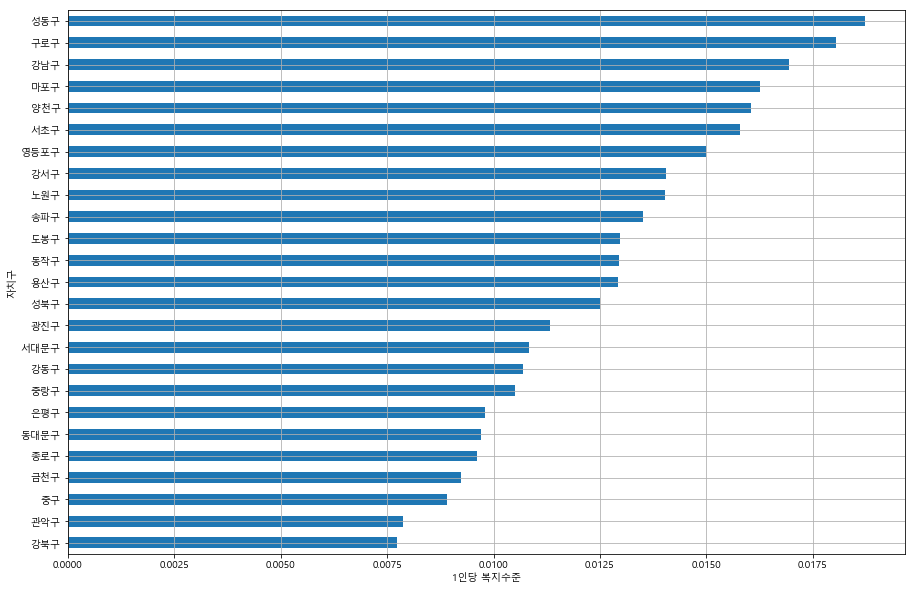

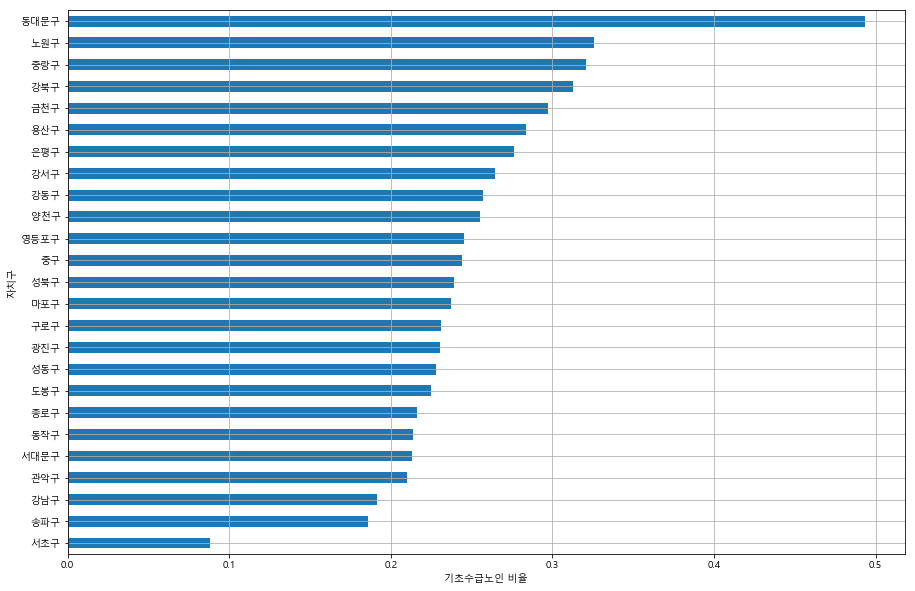

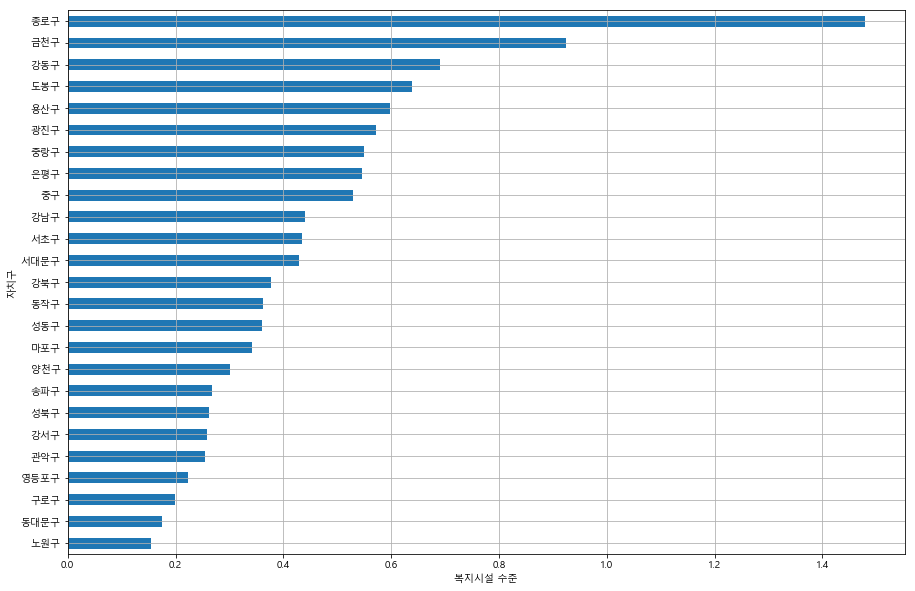

In [9]:
plt.figure()
TotalData['1인당 복지수준'].sort_values().plot(kind='barh', grid=True, figsize=(15,10))
plt.xlabel('1인당 복지수준')
plt.show()

plt.figure()
TotalData['기초수급노인 비율'].sort_values().plot(kind='barh', grid=True, figsize=(15,10))
plt.xlabel('기초수급노인 비율')
plt.show()

plt.figure()
TotalData['복지시설 수준'].sort_values().plot(kind='barh', grid=True, figsize=(15,10))
plt.xlabel('복지시설 수준')
plt.show()

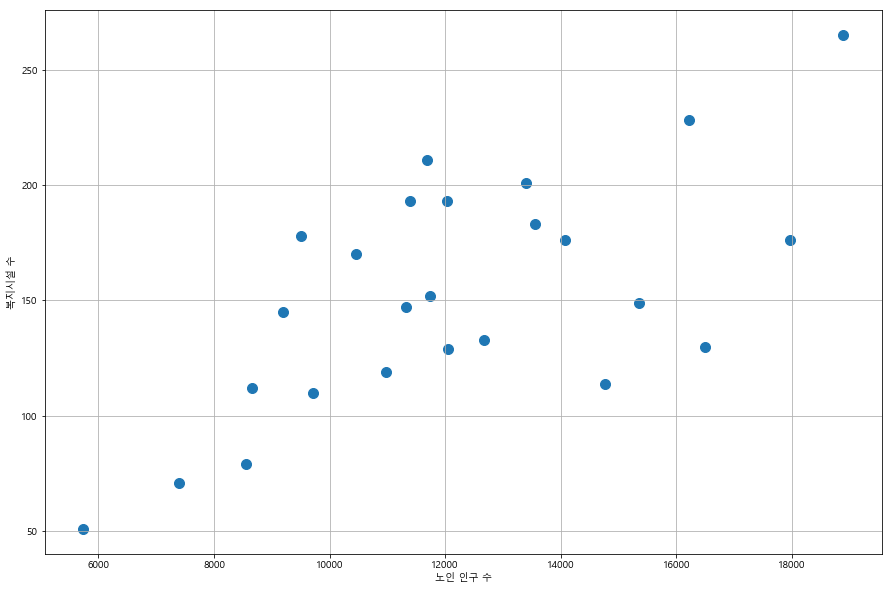

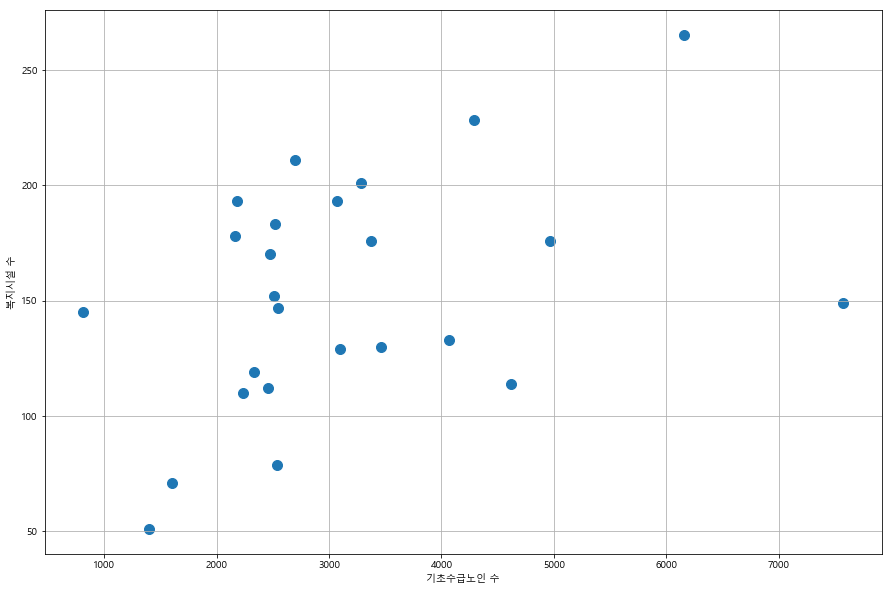

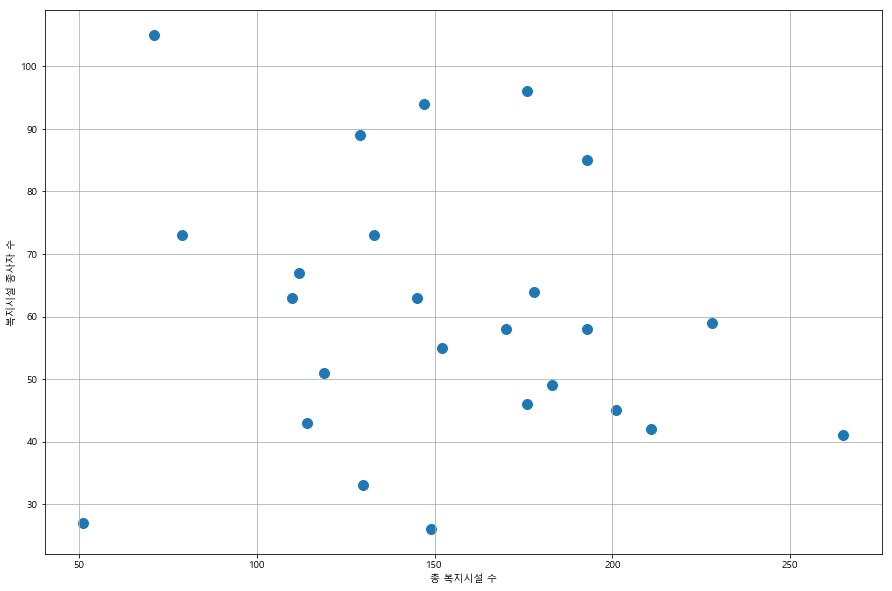

In [10]:
plt.figure(figsize=(15,10))
plt.scatter(TotalData['노인 총 인구 수'], TotalData['총 복지시설 수'], s=100)
plt.xlabel('노인 인구 수')
plt.ylabel('복지시설 수')
plt.grid()
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(TotalData['기초수급노인 수'], TotalData['총 복지시설 수'], s=100)
plt.xlabel('기초수급노인 수')
plt.ylabel('복지시설 수')
plt.grid()
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(TotalData['총 복지시설 수'], TotalData['복지시설 종사자 수'], s=100)
plt.xlabel('총 복지시설 수')
plt.ylabel('복지시설 종사자 수')
plt.grid()
plt.show()

In [11]:
fp1 = np.polyfit(TotalData['노인 총 인구 수'], TotalData['총 복지시설 수'],1)
f1 = np.poly1d(fp1)
fx1 = np.linspace(5000, 20000, 100)

fp2 = np.polyfit(TotalData['기초수급노인 수'], TotalData['총 복지시설 수'],1)
f2 = np.poly1d(fp2)
fx2 = np.linspace(500, 8000, 100)

fp3 = np.polyfit(TotalData['총 복지시설 수'], TotalData['복지시설 종사자 수'],1)
f3 = np.poly1d(fp3)
fx3 = np.linspace(50, 275, 100)

TotalData['오차1'] = np.abs(TotalData['총 복지시설 수'] - f1(TotalData['노인 총 인구 수']))
TotalData['오차2'] = np.abs(TotalData['총 복지시설 수'] - f2(TotalData['기초수급노인 수']))
TotalData['오차3'] = np.abs(TotalData['복지시설 종사자 수'] - f3(TotalData['총 복지시설 수']))
TotalData.head()

,노인 총 인구 수,기초수급노인 수,나머지 인구 수,총 복지시설 수,노인복지관,경로당,노인교실,복지시설 종사자 수,1인당 복지수준,기초수급노인 비율,복지시설 수준,오차1,오차2,오차3
자치구,,,,,,,,,,,,,,
종로구,7394.0,1600.0,5794.0,71.0,3.0,57.0,11.0,105.0,0.009602,0.216392,1.478873,33.444144,60.819486,39.447274
중구,5725.0,1398.0,4327.0,51.0,1.0,47.0,3.0,27.0,0.008908,0.244192,0.529412,36.555553,78.089191,39.864669
용산구,8664.0,2455.0,6209.0,112.0,2.0,85.0,25.0,67.0,0.012927,0.283356,0.598214,5.295258,31.375930,4.136756
성동구,9508.0,2165.0,7343.0,178.0,3.0,159.0,16.0,64.0,0.018721,0.227703,0.359551,52.164317,38.543800,5.466167
광진구,9711.0,2238.0,7473.0,110.0,1.0,97.0,12.0,63.0,0.011327,0.230460,0.572727,17.889837,30.442891,0.005562


In [12]:
print('노인인구와 복지시설수 상관계수\n',np.corrcoef(TotalData['노인 총 인구 수'], TotalData['총 복지시설 수']))
print('기초수급노인과 복지시설수 상관계수\n',np.corrcoef(TotalData['기초수급노인 수'], TotalData['총 복지시설 수']))
print('복지시설 종사자수와 복지시설수 상관계수\n',np.corrcoef(TotalData['총 복지시설 수'], TotalData['복지시설 종사자 수']))

노인인구와 복지시설수 상관계수
 [[1.         0.65917319]
 [0.65917319 1.        ]]
기초수급노인과 복지시설수 상관계수
 [[1.         0.40232664]
 [0.40232664 1.        ]]
복지시설 종사자수와 복지시설수 상관계수
 [[ 1.         -0.15385677]
 [-0.15385677  1.        ]]


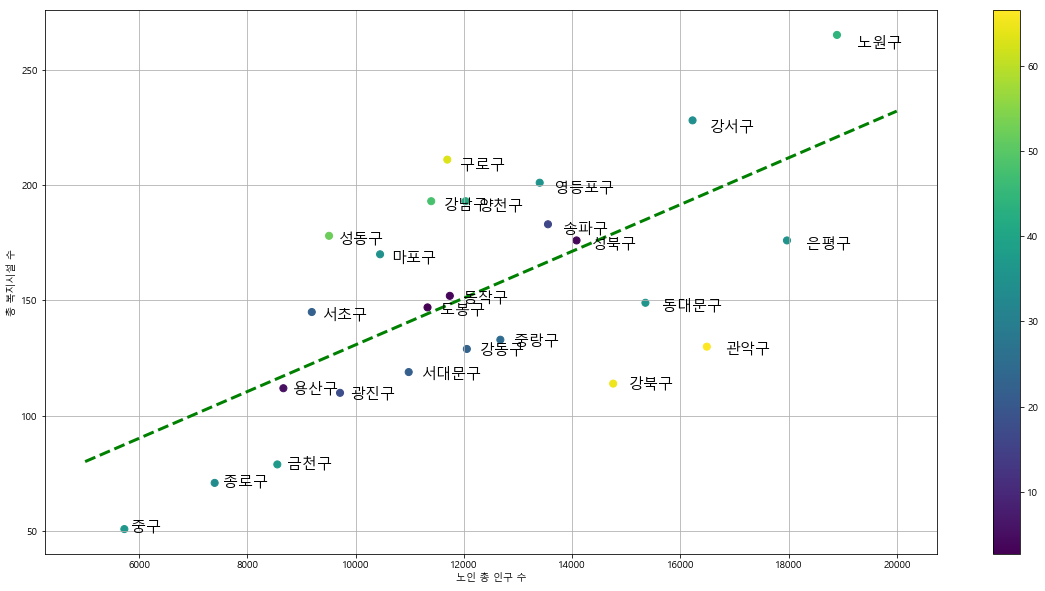

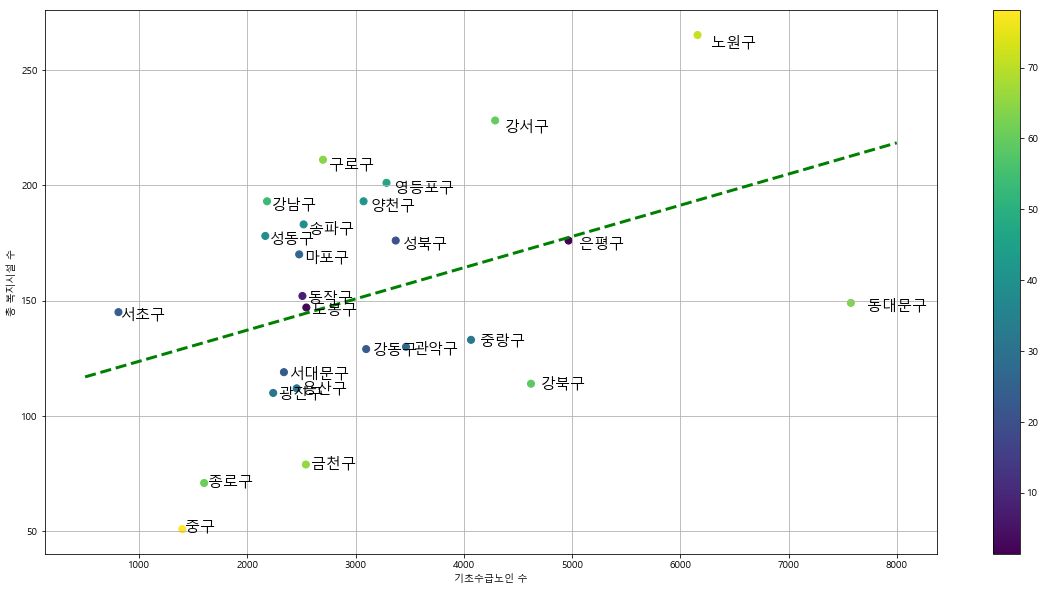

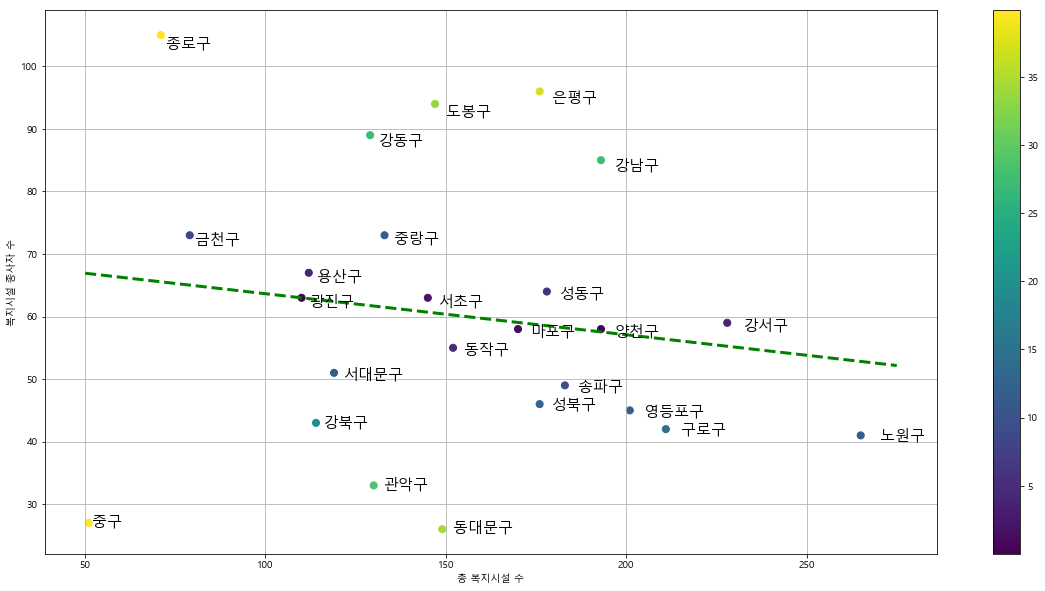

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(TotalData['노인 총 인구 수'], TotalData['총 복지시설 수'], 
            c=TotalData['오차1'], s=50)
plt.plot(fx1, f1(fx1), ls='dashed', lw=3, color='g')
for n in range(25):
    plt.text(TotalData['노인 총 인구 수'][n]*1.02, TotalData['총 복지시설 수'][n]*0.98, 
             TotalData.index[n], fontsize=15)  
plt.xlabel('노인 총 인구 수')
plt.ylabel('총 복지시설 수')
plt.colorbar()
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(TotalData['기초수급노인 수'], TotalData['총 복지시설 수'], 
            c=TotalData['오차2'], s=50)
plt.plot(fx2, f2(fx2), ls='dashed', lw=3, color='g')
for n in range(25):
    plt.text(TotalData['기초수급노인 수'][n]*1.02, TotalData['총 복지시설 수'][n]*0.98, 
             TotalData.index[n], fontsize=15)  
plt.xlabel('기초수급노인 수')
plt.ylabel('총 복지시설 수')
plt.colorbar()
plt.grid()
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(TotalData['총 복지시설 수'], TotalData['복지시설 종사자 수'], 
            c=TotalData['오차3'], s=50)
plt.plot(fx3, f3(fx3), ls='dashed', lw=3, color='g')
for n in range(25):
    plt.text(TotalData['총 복지시설 수'][n]*1.02, TotalData['복지시설 종사자 수'][n]*0.98, 
             TotalData.index[n], fontsize=15)  
plt.xlabel('총 복지시설 수')
plt.ylabel('복지시설 종사자 수')
plt.colorbar()
plt.grid()
plt.show()